In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

dataset source: https://www.kaggle.com/harlfoxem/housesalesprediction

In [3]:
# load data
kc_house = pd.read_csv('kc_house_data.csv')
display(kc_house.head())

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
# dataset description
print("Rows     : ", kc_house.shape[0])
print("Columns  : ", kc_house.shape[1])
print("\nFeatures : \n", list(kc_house.columns))
print("\nMissing values :  ", kc_house.isnull().sum().values.sum())
print("\nUnique values :  \n", kc_house.nunique())

kc_house.describe(include = 'all')

Rows     :  21613
Columns  :  21

Features : 
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Missing values :   0

Unique values :  
 id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.114757   2079.899736  1.510697e+04      1.494309      0.007542   
std         0.770163    918.440897  4.142051e+04      0.539989      0.086517   
min         0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%         1.750000   1427.000000  5.040000e+03      1.000000      0.000000   
50%         2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%         2.500000   2550.000000  1.068800e+04      2.000000      0.000000   
max         8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

                view      ...               grade    sqft_above  \
count   21613.000000      ...        21613.000000  21613.000000   
unique           NaN      ...                 NaN           NaN   
top              NaN      ...                 NaN           NaN   
freq             NaN      ...                 NaN           NaN   
mean        0.234303      ...            7.656873   1788.390691   
std         0.766318      ...            1.175459    828.090978   
min         0.000000      ...            1.000000    290.000000   
25%         0.000000      ...            7.000000   1190.000000   
50%         0.000000      ...            7.000000   1560.000000   
75%         0.000000      ...            8.000000   2210.000000   
max         4.000000      ...           13.000000   9410.000000   

        sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count    21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
unique            NaN           NaN           NaN           NaN           NaN   
top               NaN           NaN           NaN           NaN           NaN   
freq              NaN           NaN           NaN           NaN           NaN   
mean       291.509045   1971.005136     84.402258  98077.939805     47.560053   
std        442.575043     29.373411    401.679240     53.505026      0.138564   
min          0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%          0.000000   1951.000000      0.000000  98033.000000     47.471000   
50%          0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%        560.000000   1997.000000      0.000000  98118.000000     47.678000   
max       4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

                long  sqft_living15     sqft_lot15  
count   21613.000000   21613.000000   21613.000000  
unique           NaN            NaN            NaN  
top              NaN            NaN            NaN  
freq             NaN            NaN            NaN  
mean     -122.213896    1986.552492   12768.455652  
std         0.140828     685.391304   27304.179631  
min      -122.519000     399.000000     651.000000  
25%      -122.328000    14

Data Cleaning

In [5]:
# find the missing data
kc_house_missing = kc_house.isna()
kc_house_missing.sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Visualizations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# include the plots in the notebook
%matplotlib inline

warnings.simplefilter(action='ignore', category=FutureWarning)
# set random seed to reproduce the result
np.random.seed(0)

1. Looking at the distribution of the target variable

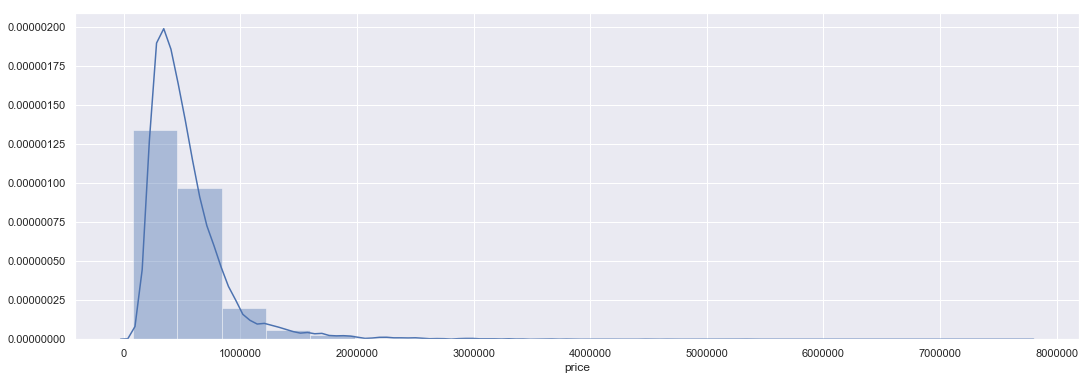

In [7]:
plt.figure(figsize=(18, 6))
sns.distplot(kc_house.price, bins=20)

In [8]:
#dropping the id and date variables which will not be used for prediction
kc_house = kc_house.drop(['id', 'date'], axis=1)

2. After dropping the variables that are not useful, we will plot a pairplot to see the relationship between the rest of the variables, so as to find the variables that directly impact price(which is the target variable)

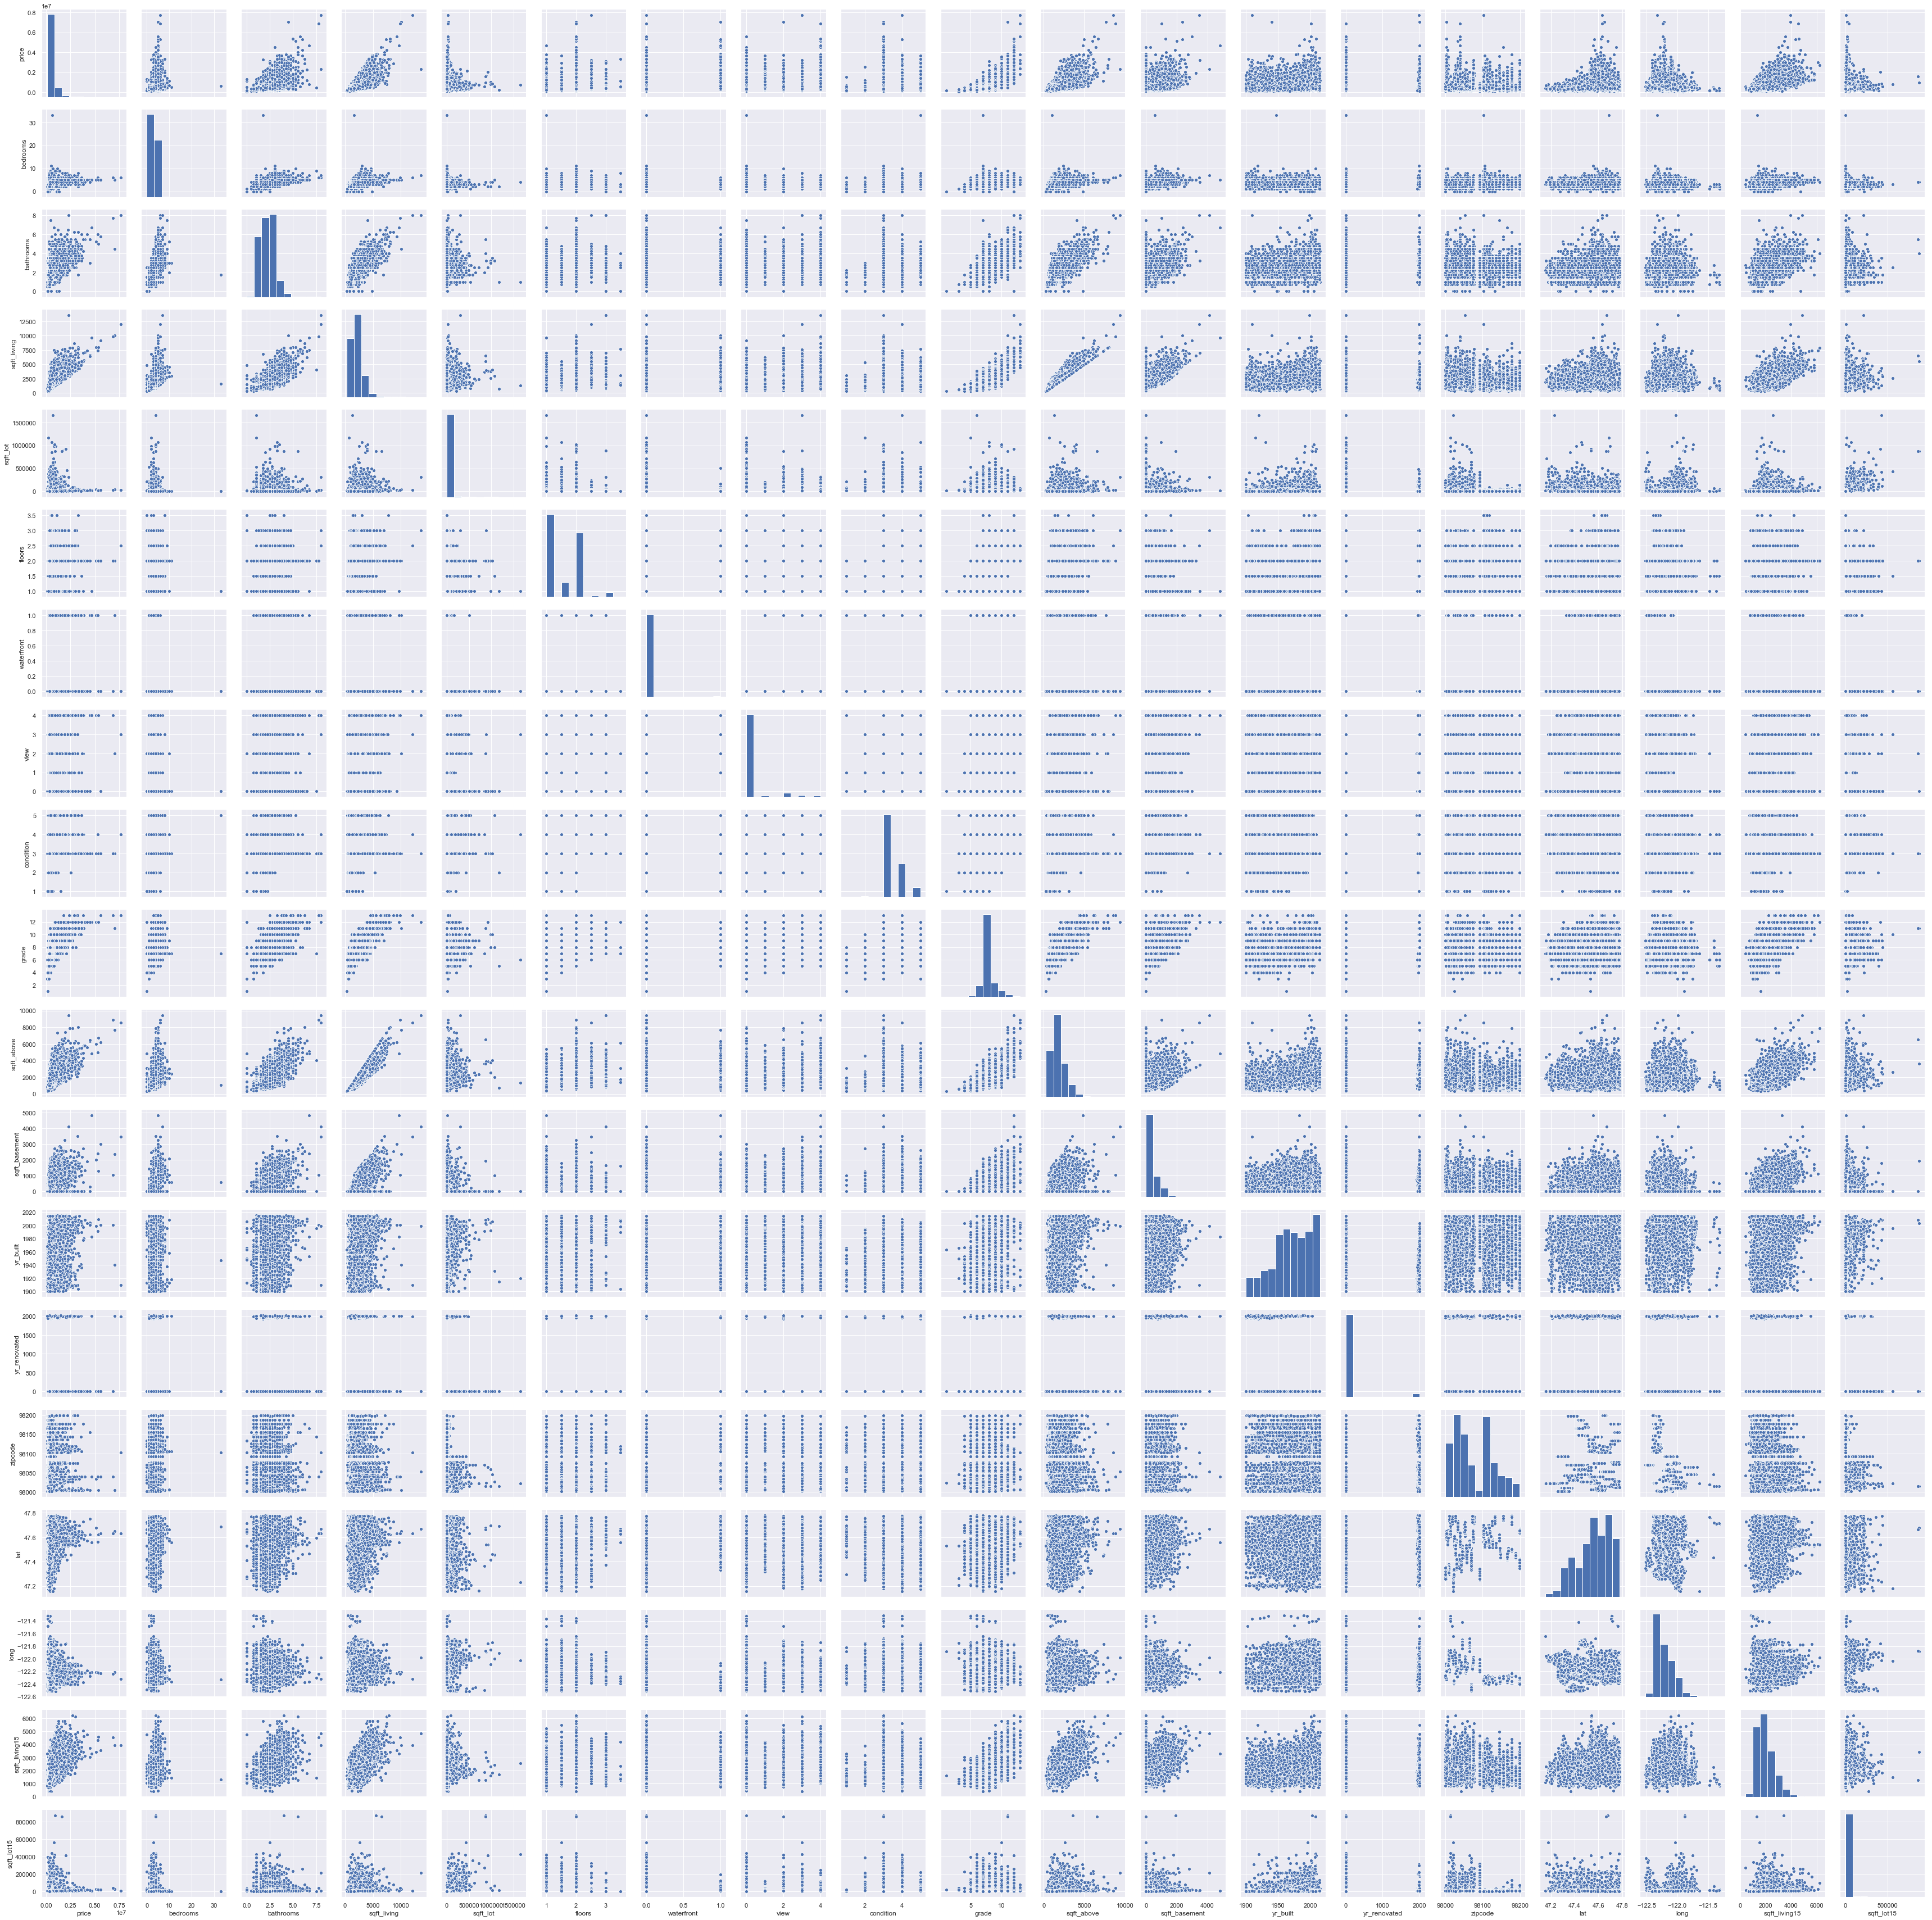

In [9]:
sns.pairplot(kc_house, height=2.5)

In [10]:
attr = kc_house.values
print(kc_house.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']


3. Also plotting a correlation matrix for finding the correlation between the various column values

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.074933   0.111678     0.133319  0.117450  0.072283   
bedrooms       0.074933  1.000000   0.224452     0.212239 -0.001801  0.094156   
bathrooms      0.111678  0.224452   1.000000     0.207442  0.120150  0.152878   
sqft_living    0.133319  0.212239   0.207442     1.000000  0.118826  0.107214   
sqft_lot       0.117450 -0.001801   0.120150     0.118826  1.000000  0.138129   
floors         0.072283  0.094156   0.152878     0.107214  0.138129  1.000000   
waterfront     0.036614  0.011830   0.059993     0.054486  0.047621  0.025619   
view           0.039385  0.069492   0.124661     0.098859  0.007326  0.010207   
condition     -0.039620 -0.012104  -0.116498    -0.092802 -0.116813 -0.175250   
grade          0.175538  0.229366   0.338406     0.311659  0.162857  0.234026   
sqft_above     0.138933  0.192587   0.233406     0.693384  0.138015  0.173121   
sqft_basement  0.021212  0.130302   0.142734     0.103146  0.007603 -0.109345   
sqft_living15  0.115368  0.122090   0.144075     0.370591  0.097362  0.071081   
sqft_lot15     0.120915  0.008055   0.116886     0.127419  0.512327  0.106636   

               waterfront      view  condition     grade  sqft_above  \
price            0.036614  0.039385  -0.039620  0.175538    0.138933   
bedrooms         0.011830  0.069492  -0.012104  0.229366    0.192587   
bathrooms        0.059993  0.124661  -0.116498  0.338406    0.233406   
sqft_living      0.054486  0.098859  -0.092802  0.311659    0.693384   
sqft_lot         0.047621  0.007326  -0.116813  0.162857    0.138015   
floors           0.025619  0.010207  -0.175250  0.234026    0.173121   
waterfront       1.000000  0.180977   0.013061  0.075330    0.039491   
view             0.180977  1.000000   0.023158  0.167896    0.053053   
condition        0.013061  0.023158   1.000000 -0.142126   -0.124158   
grade            0.075330  0.167896  -0.142126  1.000000    0.332577   
sqft_above       0.039491  0.053053  -0.124158  0.332577    1.000000   
sqft_basement    0.051314  0.168534   0.054432  0.043891   -0.038685   
sqft_living15    0.039735  0.079386  -0.082177  0.281366    0.374308   
sqft_lot15       0.047484  0.008343  -0.104477  0.160148    0.142072   

               sqft_basement  sqft_living15  sqft_lot15  
price               0.021212       0.115368    0.120915  
bedrooms            0.130302       0.122090    0.008055  
bathrooms           0.142734       0.144075    0.116886  
sqft_living         0.103146       0.370591    0.127419  
sqft_lot            0.007603       0.097362    0.512327  
floors             -0.109345       0.071081    0.106636  
waterfront          0.051314       0.039735    0.047484  
view                0.168534       0.079386    0.008343  
condition           0.054432      -0.082177   -0.104477  
grade               0.043891       0.281366    0.160148  
sqft_above         -0.038685       0.374308    0.142072  
sqft_basement       1.000000       0.009565    0.011204  
sqft_living15       0.009565       1.000000    0.108185  
sqft_lot15          0.011204       0.108185    1.000000

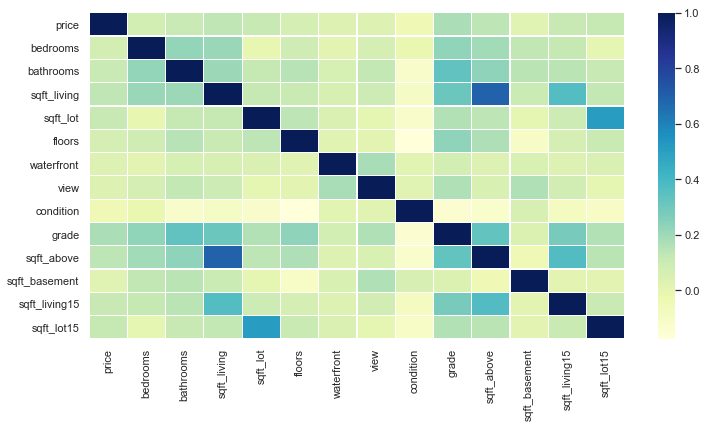

In [11]:
plt.figure(figsize=(12, 6))
corr = kc_house[['price','bedrooms','bathrooms','sqft_living', 'sqft_lot',
 'floors', 'waterfront' ,'view', 'condition' ,'grade', 'sqft_above',
 'sqft_basement','sqft_living15', 'sqft_lot15']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

4. Looking at the trend for home prices based on when they were built.

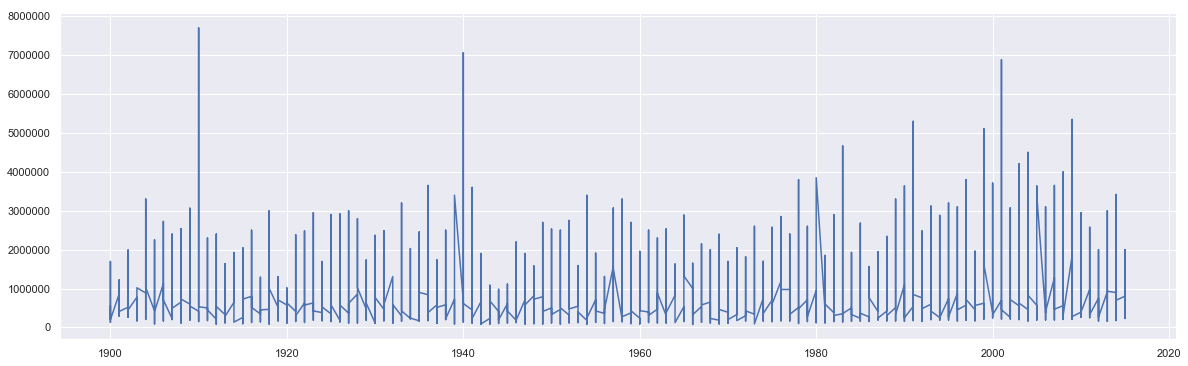

In [12]:
plt.figure(figsize=(20,6))
df = kc_house.sort_values('yr_built')
plt.plot(df.yr_built,df.price)

5. Looking at the trend for home prices based on when they were renovated.

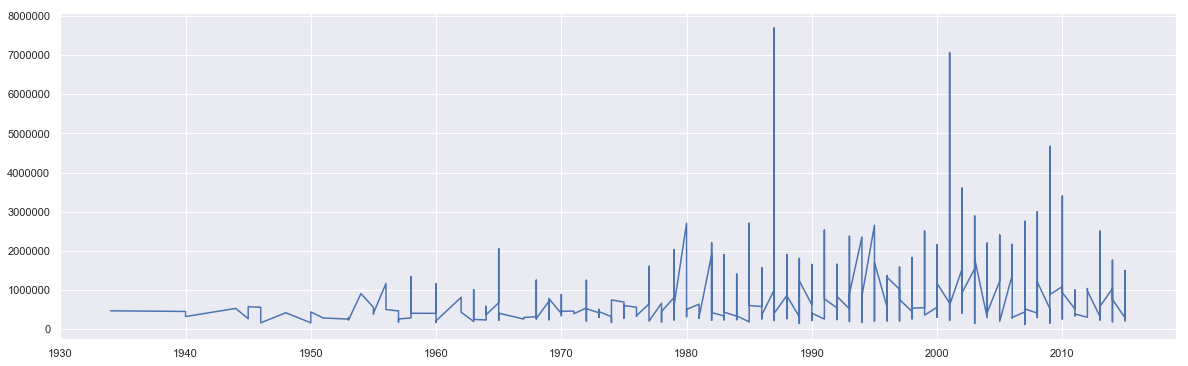

In [13]:
plt.figure(figsize=(20,6))
df = kc_house[kc_house['yr_renovated'] !=0 ].sort_values('yr_renovated')
plt.plot(df.yr_renovated,df.price)

6. Distribution of Prices on the basis of the number of bedrooms in the house

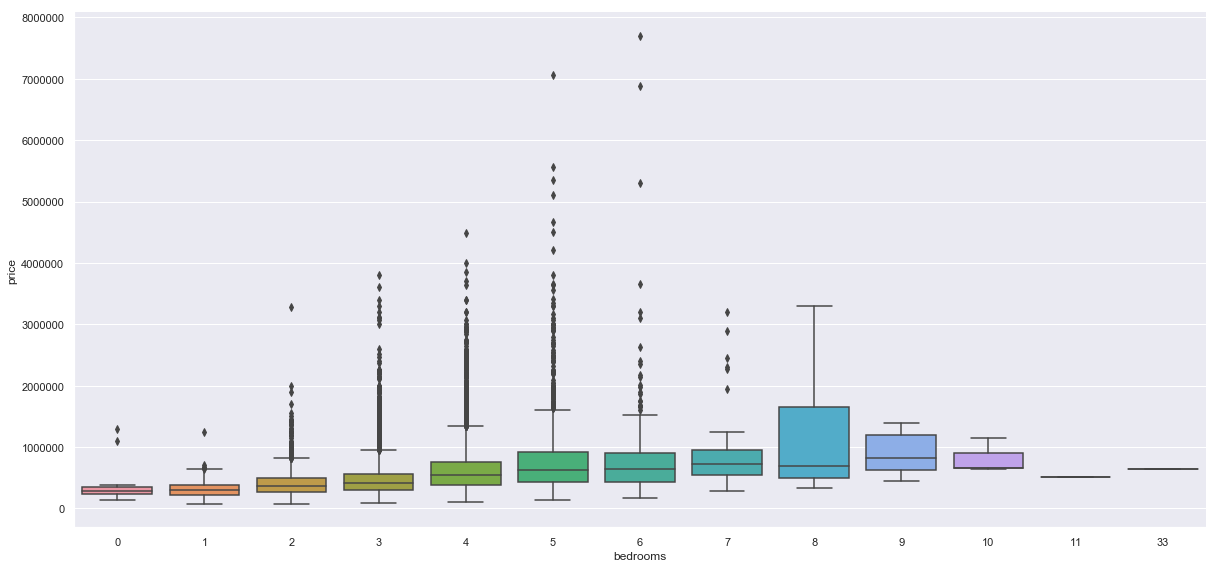

In [14]:
sns.catplot(x="bedrooms", y="price", kind="box", data=kc_house,height = 8,aspect=24/11.27)

7. Distribution of Prices on the basis of the number of bathrooms in the house

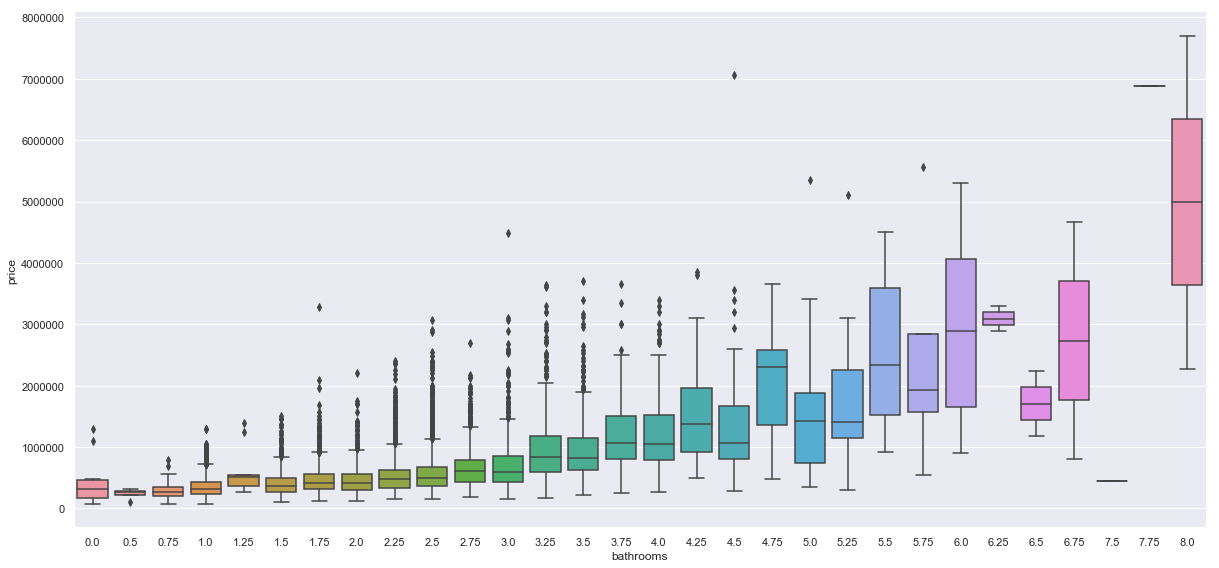

In [15]:
sns.catplot(x="bathrooms", y="price", kind="box", data=kc_house,height = 8,aspect=24/11.27)

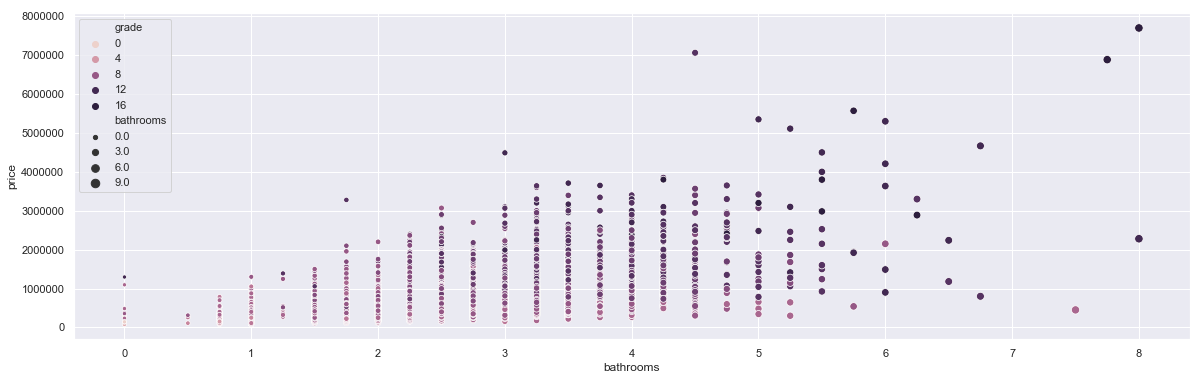

In [16]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="bathrooms",y="price",hue="grade",size="bathrooms",data=kc_house)

8. Distribution of Prices on the basis of whether the house has a waterfront

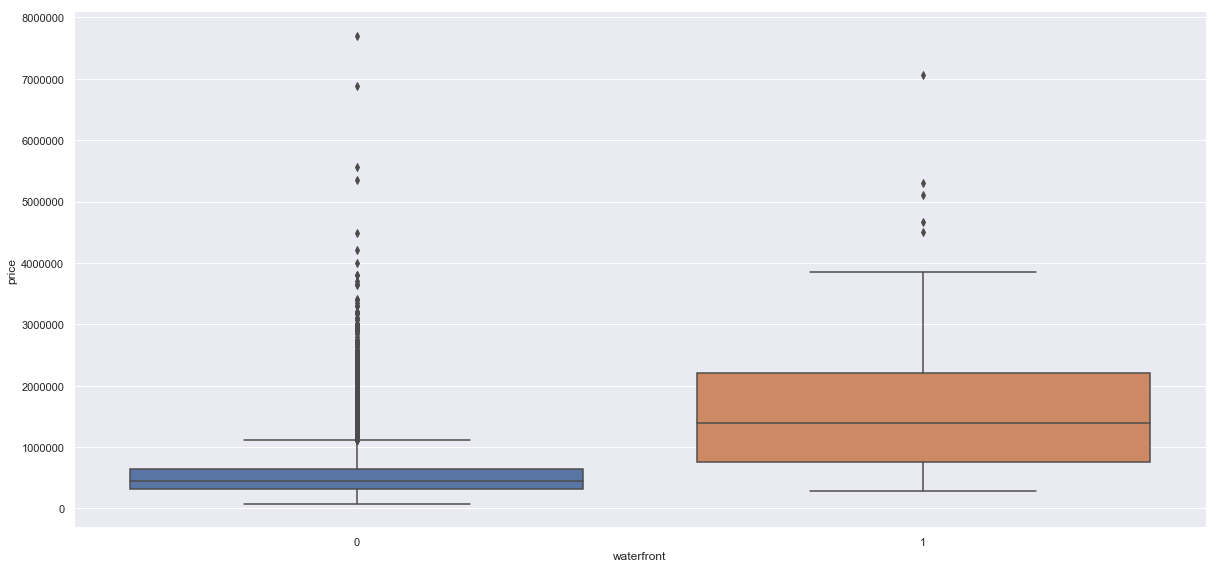

In [17]:
sns.catplot(x="waterfront", y="price", kind="box", data=kc_house,height = 8,aspect=24/11.27)

9. Distribution of Prices on the basis of whether the view from the house

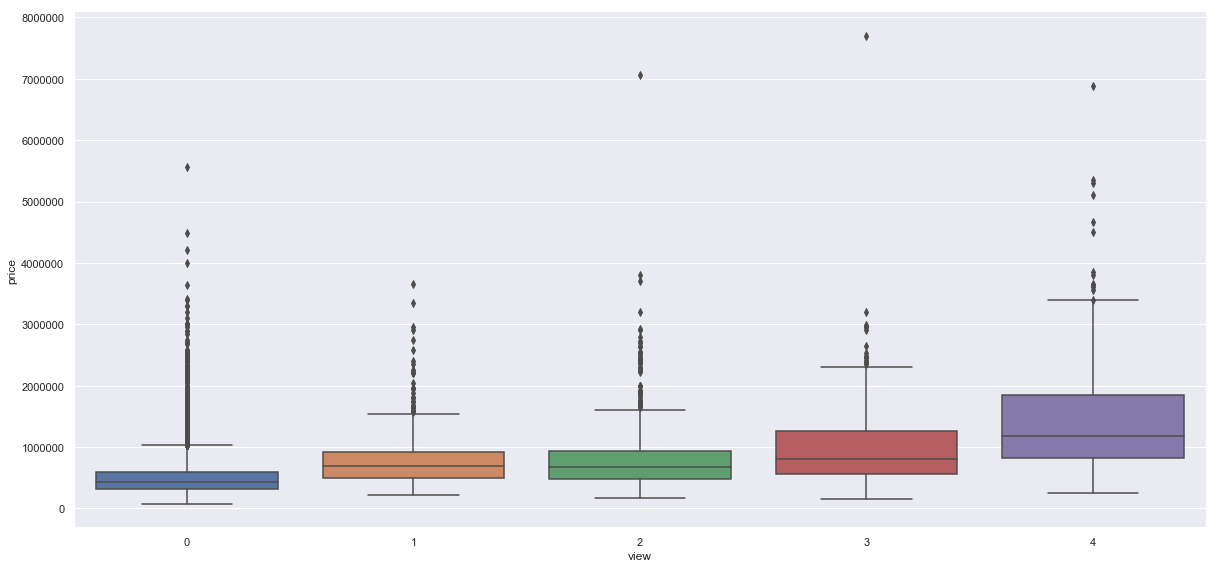

In [18]:
sns.catplot(x="view", y="price", kind="box", data=kc_house,height = 8,aspect=24/11.27)

9. Distribution of Prices on the basis of the condition of the the house

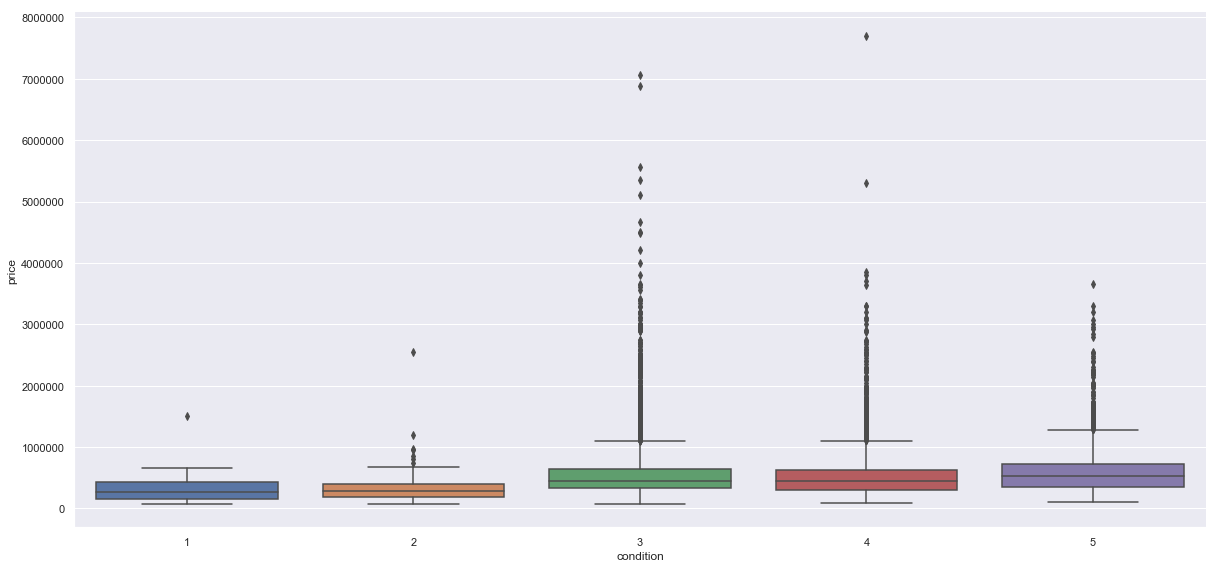

In [19]:
sns.catplot(x="condition", y="price", kind="box", data=kc_house,height = 8,aspect=24/11.27)

10. Distribution of Prices on the basis of the grade of the the house

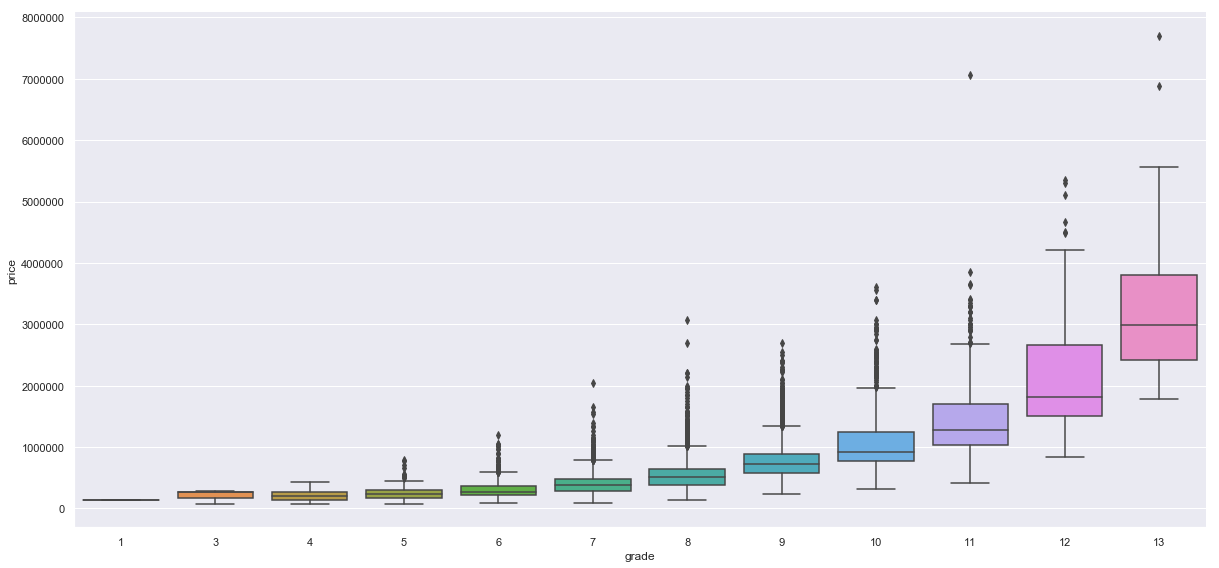

In [20]:
sns.catplot(x="grade", y="price", kind="box", data=kc_house,height = 8,aspect=24/11.27)

11. Distribution of Prices on the basis of the number of floors in the the house

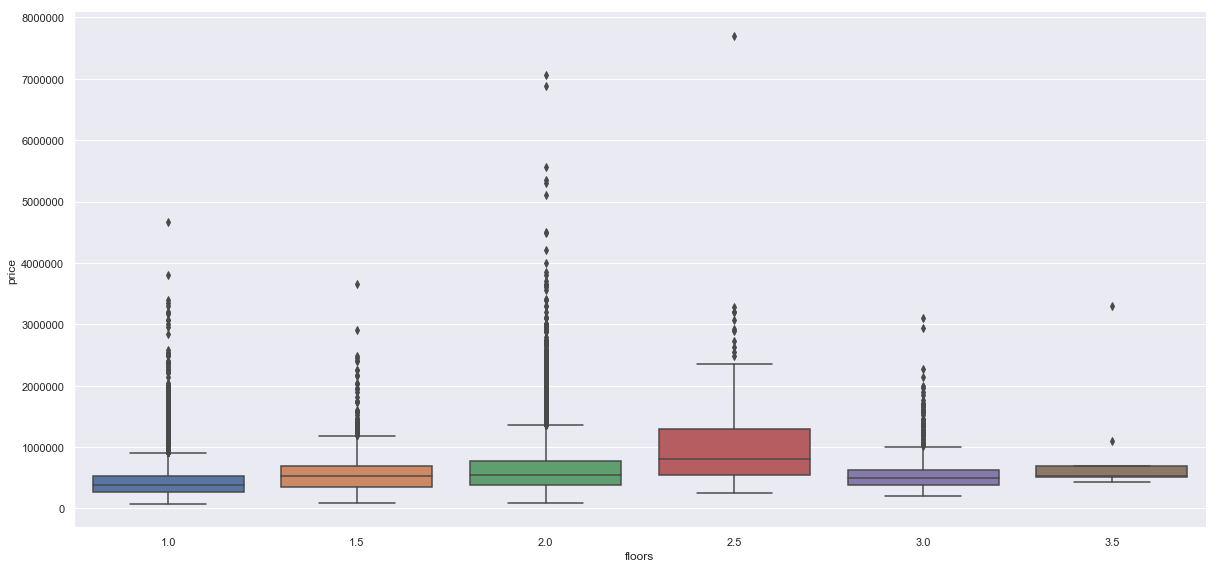

In [21]:
sns.catplot(x="floors", y="price", kind="box", data=kc_house,height = 8,aspect=24/11.27)

11. Scatterplot to see the distribution of Prices on the basis of the zipcode of the the house

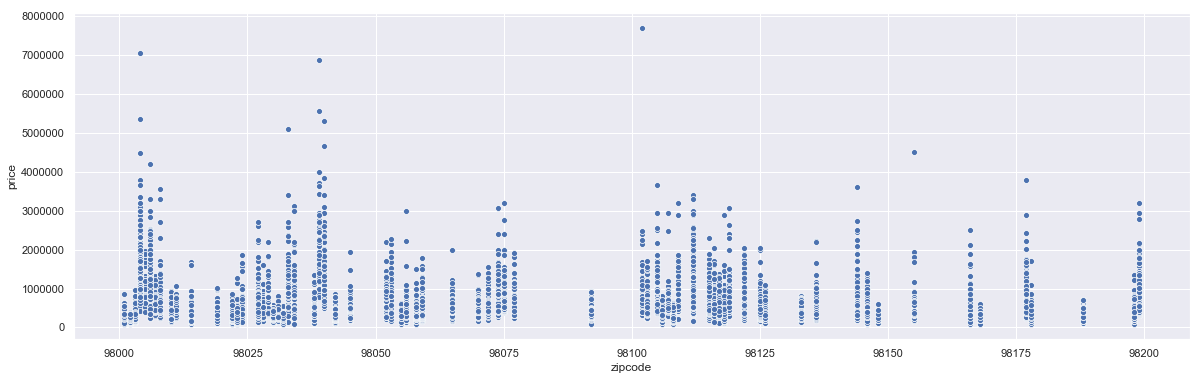

In [22]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="zipcode", y="price", data=kc_house)

13. Relation between sqft living and Price

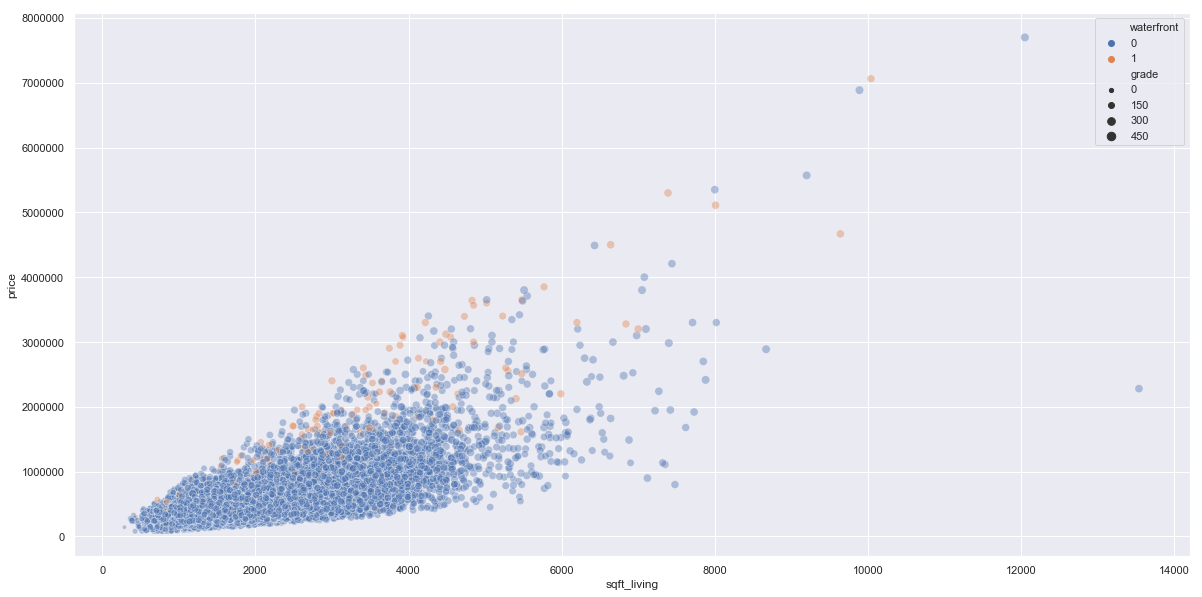

In [23]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="sqft_living", y="price", data=kc_house,hue="waterfront",alpha=0.4,size=kc_house.grade*30)

14. Relation between sqft lot and Price

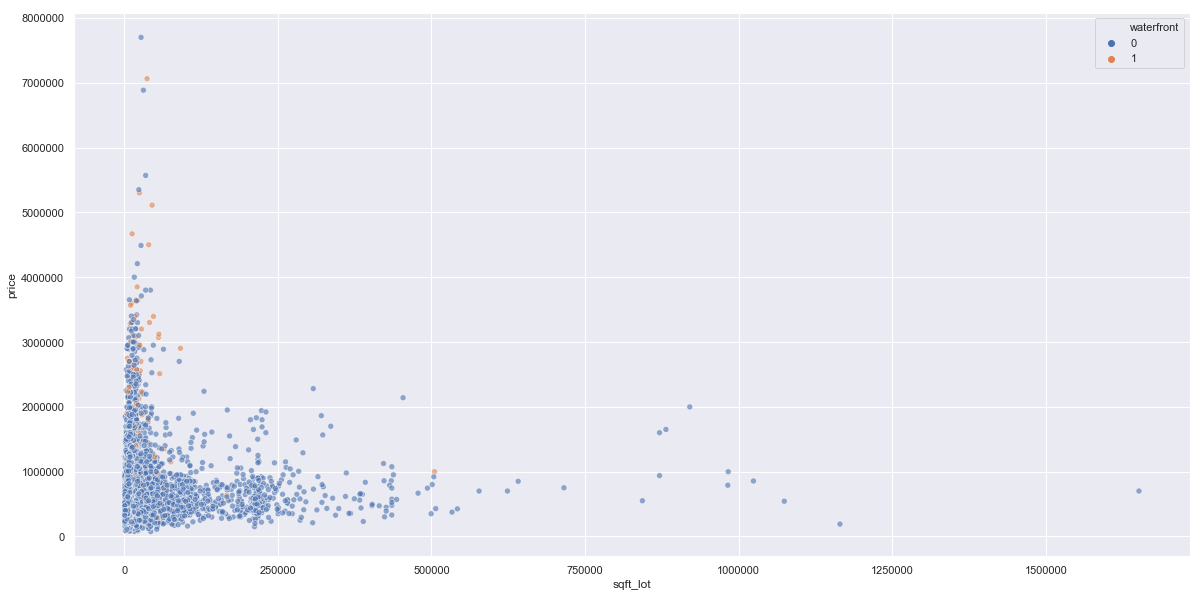

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="sqft_lot", y="price", data=kc_house,hue="waterfront",alpha=0.6)

15. Relation between sqft above and Price

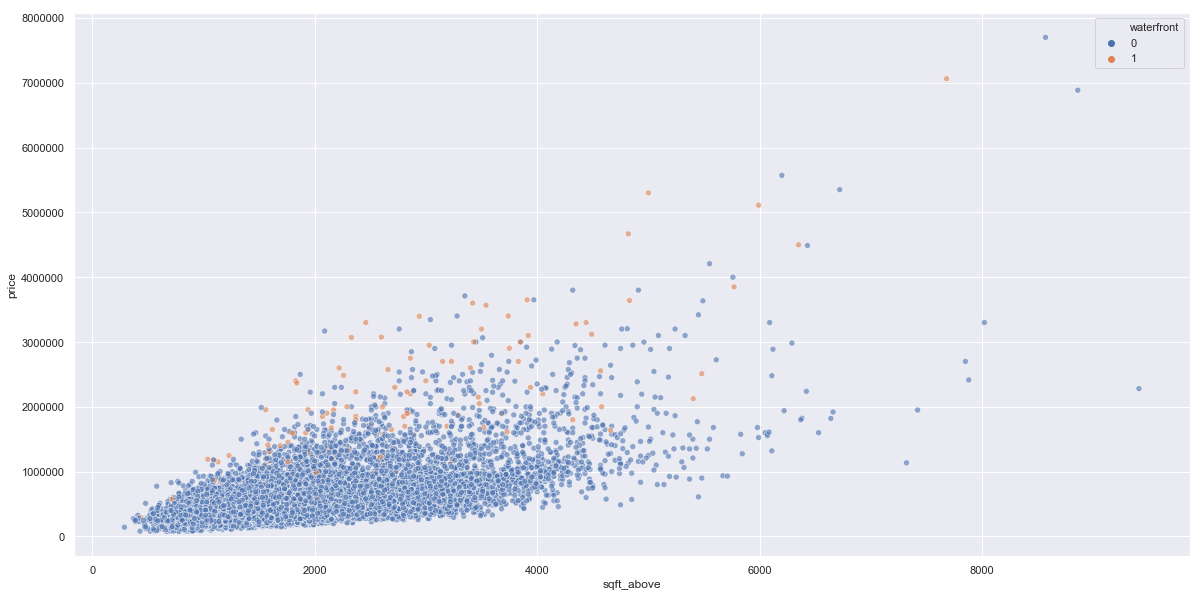

In [25]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="sqft_above", y="price", data=kc_house,hue="waterfront",alpha=0.6)

16. Relation between sqft basement and Price

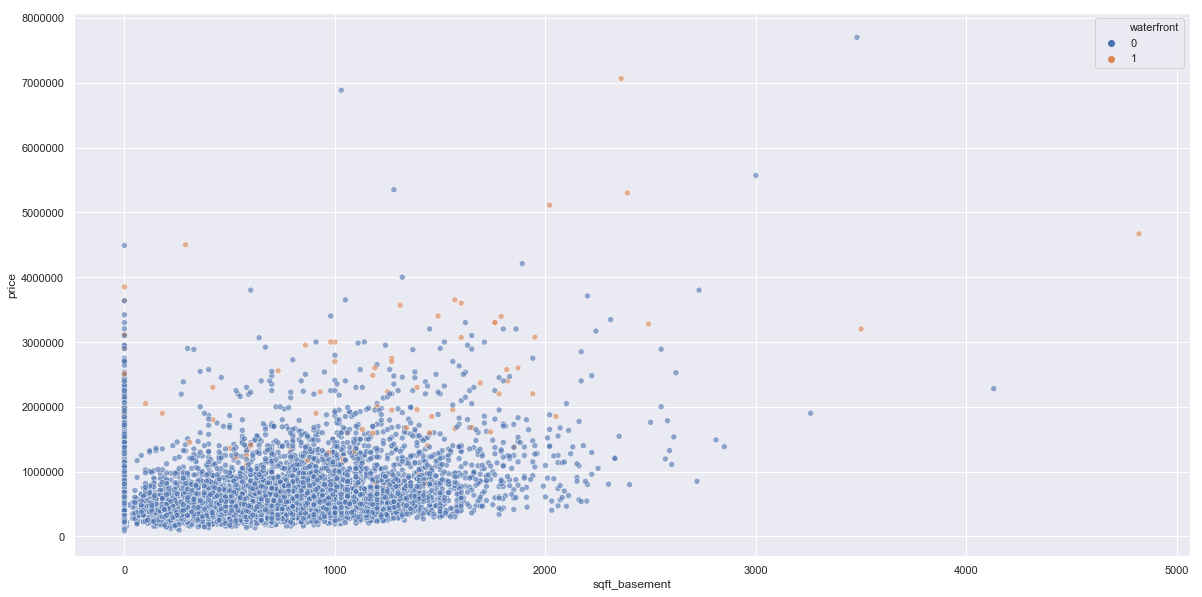

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="sqft_basement", y="price", data=kc_house,hue="waterfront",alpha=0.6)

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [28]:
import sklearn
print(sklearn.__version__)

0.20.1


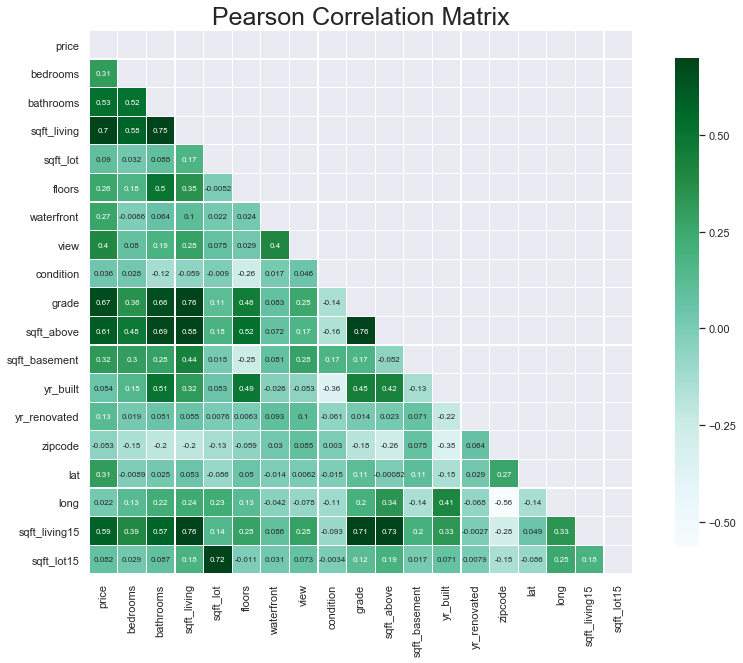

In [29]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(kc_house[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(kc_house[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Implementation of Multiple Linear Regression, Gradient Boosting Regression and Random Forest prediction models
Goal - Predict prices of house in King county based on their features
Target variable - Price ==> numerical variable

Linear Regression

In [30]:
from sklearn import linear_model

# From the heat map and correlation values above, we can choose 10 features that affect price the most.
X = kc_house[['yr_renovated','sqft_above','sqft_living','sqft_basement','bedrooms', 'bathrooms','sqft_lot','waterfront','view','grade','floors']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y = kc_house['price']
X.head()

yr_renovated  sqft_above  sqft_living  sqft_basement  bedrooms  bathrooms  \
0             0        1180         1180              0         3       1.00   
1          1991        2170         2570            400         3       2.25   
2             0         770          770              0         2       1.00   
3             0        1050         1960            910         4       3.00   
4             0        1680         1680              0         3       2.00   

   sqft_lot  waterfront  view  grade  floors  
0      5650           0     0      7     1.0  
1      7242           0     0      7     2.0  
2     10000           0     0      6     1.0  
3      5000           0     0      7     1.0  
4      8080           0     0      8     1.0

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =2)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)
# Prediction accuracy of 10% split test data

0.6308386740642661

In [32]:
# Print out the fitted coefficients
np.set_printoptions(precision=4, suppress=True) # set precision for numpy arrays
print (reg.coef_)

[    64.1722     49.5589    139.1218     89.5628 -31965.3628 -19936.7019
     -0.3441 589317.093   57505.0481 100924.8242 -15068.6995]


In [33]:
reg.score(x_train,y_train)
# Prediction accuracy of 90% split training data

0.5986945042672858

In [34]:
# Linear regression with 16/19 variables - excluding the lat, long and price variables

XX = kc_house.drop(['lat', 'long', 'price'], axis=1)
yy = kc_house[['price']]
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()

scores = cross_val_score(model, XX, yy, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

# These are 10 cross validation scores using different cross-validation techniques with different split ratios
# Average cross-validation score can be considered as accuracy of the prediction.

Cross-validation scores: [0.6541 0.6597 0.6392 0.6585 0.6278 0.6589 0.6664 0.6557 0.6552 0.597 ]
Average cross-validation score: 0.65


Gradient Boosting Regression

In [35]:
# 11 variable used above
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)
clf.score(x_test,y_test)
# Prediction accuracy of 10% split test data with 11 vairables

0.7164984925088353

In [36]:
clf.score(x_train,y_train)
# Prediction accuracy of 90% split training data with 11 variables

0.8701109812371318

In [37]:
# Considering 16 variables
x_train , x_test , y_train , y_test = train_test_split(XX , yy , test_size = 0.10,random_state =2)
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)
clf.score(x_test,y_test)
# Prediction accuracy of 10% split test data with 16 variables

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8936973289682983

In [38]:
clf.score(x_train,y_train)
# Prediction accuracy of 90% split training data with 16 variables

0.9672920736530818

Random Forest using sklearn.ensemble.RandomForestRegressor

In [39]:
rf = ensemble.RandomForestRegressor(n_estimators = 300,max_depth=8 ,min_samples_split= 2)
rf.fit(x_train, y_train)
rf.score(x_test,y_test)
# Prediction accuracy of 10% split test data with 11 variables

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7914640240603528

In [40]:
rf.score(x_train,y_train)
# Prediction accuracy of 90% split training data with 11 variables

0.8308000788004355

Decision Tree

In [53]:
quartiles = np.percentile(kc_house['price'], [20, 40, 60, 80])
print(quartiles)

[298470. 399500. 519000. 700108.]


In [54]:
def func(x):
    if 0 < x <= 298470:
        return 1
    elif 298470 < x <= 399500:
        return 2
    elif 399500 < x <= 519000:
        return 3
    elif 519000 < x <= 700108:
        return 4
    return 5

kc_house['level'] = kc_house['price'].apply(func)

In [55]:
display(kc_house.head())

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  level  
0    98178  47.5112 -122.257           1340        5650      1  
1    98125  47.7210 -122.319           1690        7639      4  
2    98028  47.7379 -122.233           2720        8062      1  
3    98136  47.5208 -122.393           1360        5000      4  
4    98074  47.6168 -122.045           1800        7503      3

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
train_x = kc_house.loc[:,['sqft_living','grade','sqft_above','sqft_living15','view','sqft_basement']]
train_y = kc_house['level']
# model initialization
dt_model = DecisionTreeClassifier(max_depth=3)

# train the model
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

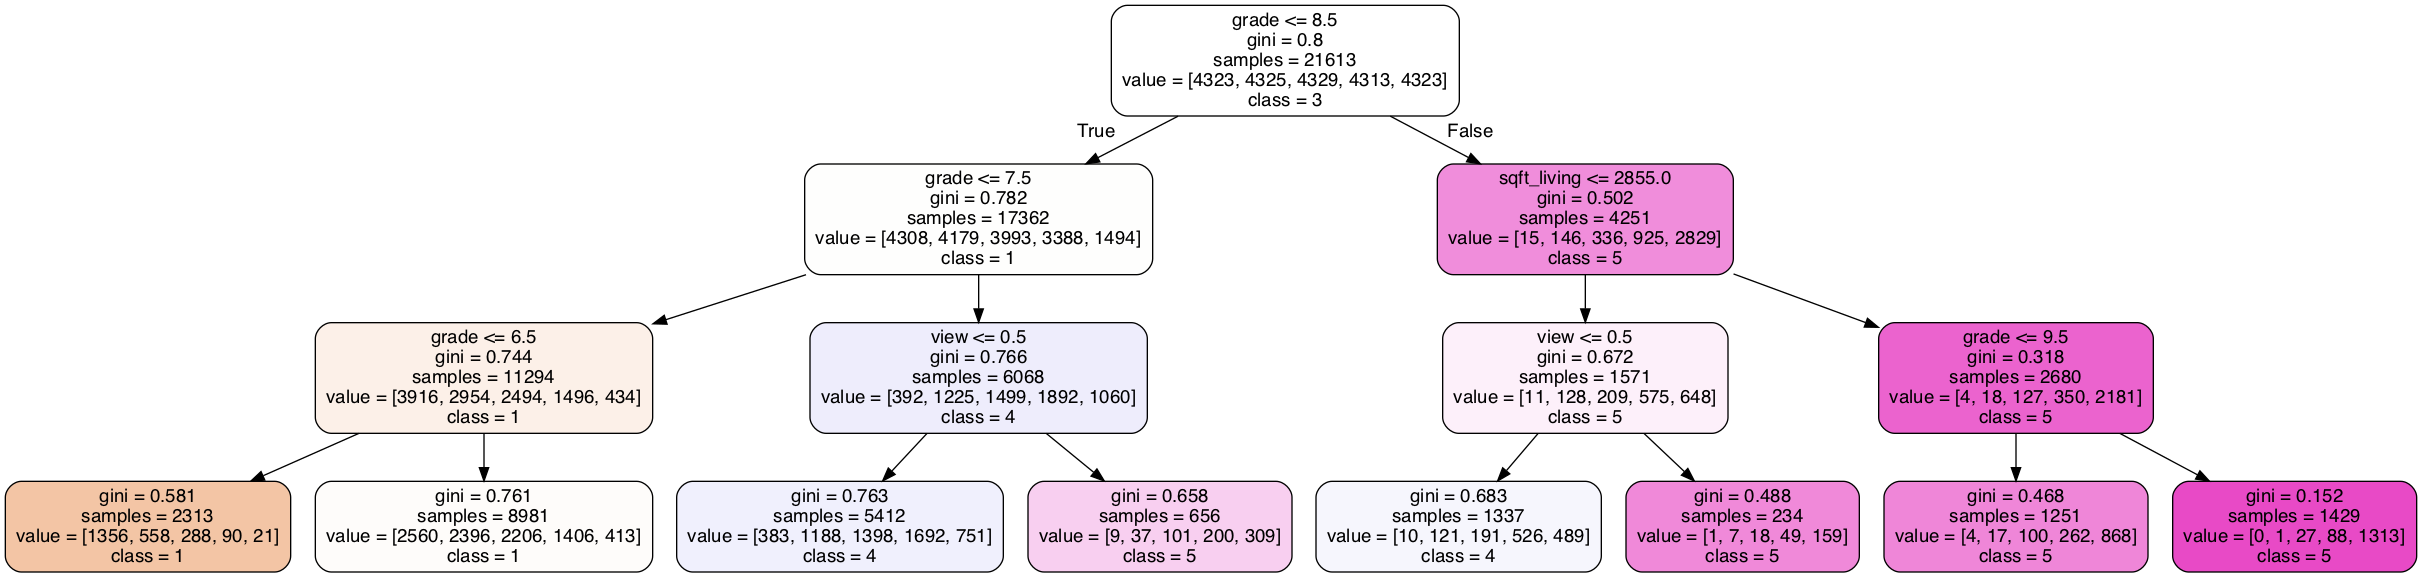

In [57]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique().astype('U')
class_names.sort()
export_graphviz(dt_model, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [58]:
train_x = kc_house.loc[:,['sqft_living','grade','sqft_above','sqft_living15','view','sqft_basement']]
train_y = kc_house.iloc[:,2]

test_x = kc_house.loc[:,['sqft_living','grade','sqft_above','sqft_living15','view','sqft_basement']]
test_y = kc_house.iloc[:,2]

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [60]:
# fine-tune the model, use grid search with cross-validation.
parameters = {
    "max_depth": [4,6,8,10,12,14,16], 
    "min_samples_split": [0.01,0.05,0.005,0.2]
}
dtr = DecisionTreeRegressor()
grid_r= GridSearchCV(dtr, parameters, cv=3)
grid_r.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16], 'min_samples_split': [0.01, 0.05, 0.005, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
# summarize the results of the grid search
print("The best score is {}".format(grid_r.best_score_))
print("The best hyper parameter setting is {}".format(grid_r.best_params_))

The best score is 0.6139727917603987
The best hyper parameter setting is {'max_depth': 6, 'min_samples_split': 0.01}


In [62]:
# use the fine-tuned model to make predictions on the test data
test_z = grid_r.predict(test_x)

print("model Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(test_y, test_z))))
print("model Mean Absolute Error: {}".format(mean_absolute_error(test_y, test_z)))

model Root Mean Squared Error: 0.45940626743898927
model Mean Absolute Error: 0.3428940433570191


# The End